# <span style="color:green"> ESERCITAZIONE 6 </span>

### <span style="color:blue">  Esercizio 06.1 </span>

<span style="color:blue">  Calcola le seguenti grandezze fisiche:
    
<span style="color:blue">  1. $U(N,T) = \langle H \rangle_{h=0}$
    
<span style="color:blue">  2. $C(N,T) = k_B \beta^2 \left(\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2\right)$ 
    
<span style="color:blue">  3. $\chi(N,T) = \beta \langle \left(\sum_{i=1,N}s_i\right)^2 \rangle_{h=0}$
    
<span style="color:blue">  4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

<span style="color:blue">  in funzione di $T$ nel range $\left[0.5;2.0\right]$ per un sistema di $N=50$ spin con $J=1$ Fare i rispettivi grafici. 

L'obiettivo di questa esercitazione è campionare il peso di Boltzmann $p(\{ s_i \}) = \exp(-\beta H)/Z$, nel contesto del modello di Ising in una dimensione perché lo si sa risolvere in maniera esatta. Una volta effettuato il campionamento del peso di Boltzmann, possiamo calcolare le quattro quantità fisiche richieste dal problema. Per risolvere il problema ho utilizzato il codice fornito nel materiale didattico, al quale ho aggiunto delle parti mancanti. 

Per calcolare le quattro grandezze fisiche richieste e le rispettive incertezze, il codice che ci è stato donato implementa già il metodo del data blocking. I blocchi sono 20 e in ciascun blocco ci sono 10000 valori. Il problema richiede di calcolare queste grandezze fisiche in funzione della temperatura $T$, per diversi valori di $T$. Questo significa effettuare la simulazione per ogni valore di $T$. Per fare ciò, ho modificato il codice, in modo da caricare due vettori: $T$ e rispettivo $\beta=1/T$. Nella funzione Main ho aggiunto un ciclo sulle $31$ temperature scelte nell'intervallo $\left[0.5;2.0\right]$. 

Il codice fornito calcola le quattro grandezze fisiche non per tutto il sistema, ma per il singolo spin, quindi tutte le quantità sono divise per il numero di spin $N=50$. Le funzioni del codice che eseguono le simulazioni sono: Move, Measure, Accumulate e Averages. Come richiesto dal testo dell'esercizio, ho aggiunto la funzione Equilibrazione all'inizio di ogni simulazione e la possibilità di ricominciare la simulazione da una configurazione salvata in precedenza.

### La funzione Move

La funzione Move effettua il campionamento del peso di Boltmann: data una distribuzione di probabilità di questa forma, mi muovo nello spazio verso i punti più probabili. Per fare questo eseguo il codice due volte in modo da usare due tecniche diverse:  l'algoritmo di Metropolis e il campionamento alla Gibbs. 

### Algoritmo di Metropolis

Si tratta di una tecnica di rigetto: viene estratta una possibile mossa, dopodiché l'algoritmo decide se accettarla o meno. Vengono calcolate la probabilità dello stato in cui si trova il sistema e la probabilità dello stato in cui vorrei che il sistema andasse. Se lo stato nuovo è più probabile dello stato attuale, la particella si sposta, altrimenti resta dove si trova e ripesa la posizione. L'equazione che descrive il rapporto tra le due probabilità è: 

\begin{equation}
   A(x|y) = min\left[1,\frac{T(x|y)p(x)}{T(y|x)p(y)}\right]
\end{equation}

$T(x|y)$ e $T(y|x)$ sono le probabilità di transizione rispettivamente da x a y e da y a x che sono uguali, in seguito all'ipotesi di ergodicità del sistema, quindi si semplificano. Le probabilità dei due sistemi sono: 

\begin{equation}
   p(x) = \exp\left(-\beta \frac{E(x)}{Z}\right) \quad p(y) = \exp\left(-\beta \frac{E(y)}{Z}\right)
\end{equation}

essendo $Z$ la funzione di partizione. Ci sarebbe un problema: la funzione di partizione non è nota. Possiamo osservare che nella formula del rapporto delle probabilità anche lei si semplifica: questo è uno dei vantaggi dell'usare l'algoritmo di Metropolis. Il rapporto finale tra le probabilità è:

\begin{equation}
   A(x|y) = min\left[1,\exp(-\beta(E(x)-E(y)))\right]
\end{equation}

essendo $E(x)$ l'energia dello stato nuovo ed $E(y)$ l'energia dello stato vecchio. Un algoritmo scritto in questo modo accetta sempre una mossa verso uno stato ad energia più bassa: l'esponenziale sarà un numero maggiore di 1, il minimo tra le due funzioni sarà 1 e accetto sempre questa mossa. Cosa succede se viene sorteggiato uno stato ad energia più alta? L'algortmo lo accetta con una probabilità $p<1$ che sarà il nuovo minimo della funzione. Viene estratto un valore nell'intervallo $[0,1)$ e lo si confronta con $p$: se è maggiore $p$ accetto la mossa, altrimenti la rifiuto. Nel caso dello stato ad energia più bassa $p$ è sempre il maggiore tra i due. L'algoritmo di Metropolis è scritto in modo da accettare qualche volta anche i punti poco probabili, altrimenti sarebbe un ottimizzatore. 

Cosa significa decidere se spostarsi o se restare nella stessa posizione? Nel problema di Ising in una dimensione significa decidere se lasciare l'orientazione dello spin invariata o se invertirla. Questo calcolo viene eseguito per tutti gli spin del problema, che sono 50 e infine viene prodotta la configurazione finale. 

### Campionamento alla Gibbs

Per calcolare la probabilità di transizione da uno spin a quello opposto, si considera la particella estratta a caso immersa in un bagno termico *bath* formato da tutte le altre. La probabilità $p$ che lo spin k-esimo s sia invertito nello spin s' è dato dalla formula: 
\begin{equation}
   p(s'(k)=\pm 1) = \frac{1}{1+exp\left(\mp 2\beta J\sum_{bath}s_i\right)}
\end{equation}

Calcolata la probabilità $p$, si procede come per l'algoritmo di Metropolis. Si confronta $p$ con un valore estratto a sorte in un intervallo $[0,1)$. Se $p$ è maggiore di questo valore, accetto la mossa e inverto lo spin, altrimenti tengo la configurazione attuale. Questo metodo di campionamento fornisce delle probabilità di transizione che consentono di campionare $s(k)$ accettando sempre la mossa proposta.

### Le funzioni Measure, Accumulate, Averages

Una volta scelto lo stato, la funzione Measure misura le quattro grandezze fisiche richieste. Lo fa per tutte le temperature, per ogni blocco, per tutti i 50 spin. La funzione Accumulate somma le quantità calcolate per tutti i blocchi. La somma totale servirà per calcolare la media di blocco. La funzione Averages calcola la media di blocco e il rispettivo errore per ciascun blocco. Il ciclo viene svolto aggiungendo ogni volta un blocco, calcolando la media per ogni blocco e facendo infine la media dei valori medi di ciascun blocco. Viene usato il metodo del data blocking. Con l'aumentare del numero di blocchi, la stima della media diventa sempre più precisa. Il numero finale di blocchi è 20. Nei grafici il valore delle quattro grandezze fisiche corrisponde alla media delle medie di 20 blocchi. L'incertezza è data dalla barra di errore.

### Esecuzione del codice

Ho modificato il codice in modo da svolgere in sequenza $31$ simulazioni, per il valore della temperatura compreso in $[0.5,2.0]$, a valori equidistanti. Il codice viene eseguito quattro volte, modificando quattro volte il file input.dat. I dati modificati sono il campo esterno $h$ e metro, con cui scegliere se campionare con l'algoritmo di Metropolis, metro $=1$, o con il metodo di Gibbs, metro $=0$. Ecco i quattro modi in cui ho eseguito il codice:
1. $h=0.0$ e metro $=1$,
2. $h=0.02$ e metro $=1$,
3. $h=0.0$ e metro $=0$,
4. $h=0.02$ e metro $=0$.

Le grandezze $U$, $C$ e $\chi$ sono calcolate ponendo il campo esterno $h=0.0$, mentre per $M$ il campo esterno è $h=0.02$. 

### Grafici

Per ciascuna delle quattro grandezze fisiche sono riportati tre grafici: 
1. grafico della curva teorica, calcolata con metodo analitico,
2. grafico della curva sperimentale, che riporta i dati calcolati con il codice,
3. confronto tra le due curve sopra: differenza tra curva teorica e curva sperimentale.

I punti rappresentati nella curva sperimentale presentano le barre di errore che sarebbe l'incertezza. Se la curva teorica è intercettata dalle barre di errore della curva sperimentale, vuol dire che l'accordo teoria-esperimento è riuscito. Nella curva sperimentale le barre di errore non si vedono perché sono molto corte rispetto alla scala del grafico. Questo problema viene risolto nel grafico della differenza tra le curve teorica e sperimentale. Se i dati sono compatibili con la teoria, la differenza tra le due curve deve essere una funzione oscillante attorno all'asse $x$ e le barre di errore lo devono intercettare. Le barre di errore hanno dimensioni compatibili con lo zero e in questo tipo di grafico si vedono. 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [18]:
T = np.linspace(0.5,2.0,31)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

<span style="color:blue"> 1. Energia interna per spin: 
\begin{equation}
   \frac{U(N,T)}{N} = \langle H \rangle_{h=0}
\end{equation}

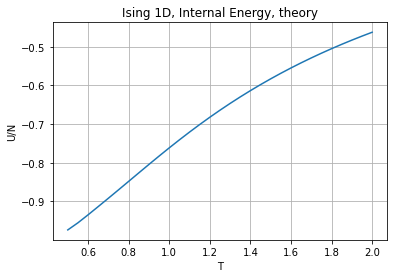

In [27]:
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e)
plt.title('Ising 1D, Internal Energy, theory')
plt.xlabel('T')
plt.ylabel('U/N')
plt.grid(True)
plt.show()

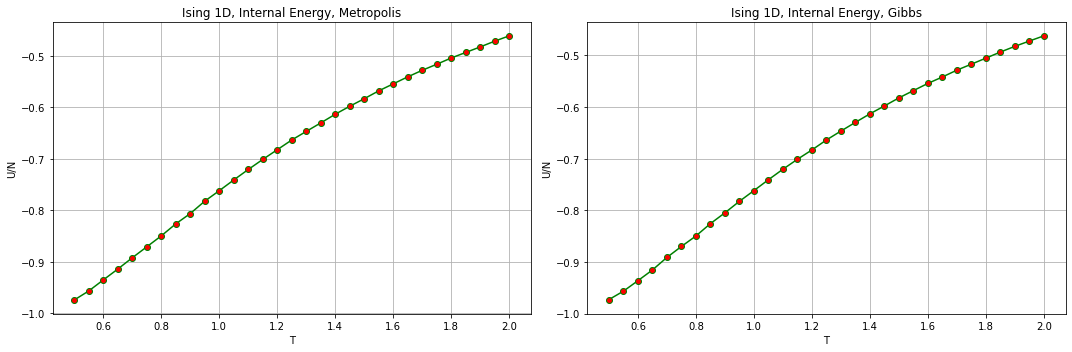

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(121)
x, f, error = np.loadtxt("Boltzmann/ene_metro.dat", unpack='true')
plt.errorbar(x,f,yerr=error, color='green', marker='o',mfc='red',mec='green')
plt.title('Ising 1D, Internal Energy, Metropolis')
plt.xlabel('T')
plt.ylabel('U/N')
plt.grid(True)

plt.subplot(122)
x, f, error = np.loadtxt("Boltzmann/ene_gibbs.dat", unpack='true')
plt.errorbar(x,f,yerr=error, color='green', marker='o',mfc='red',mec='green')
plt.title('Ising 1D, Internal Energy, Gibbs')
plt.xlabel('T')
plt.ylabel('U/N')
plt.grid(True)

plt.tight_layout()
plt.show()

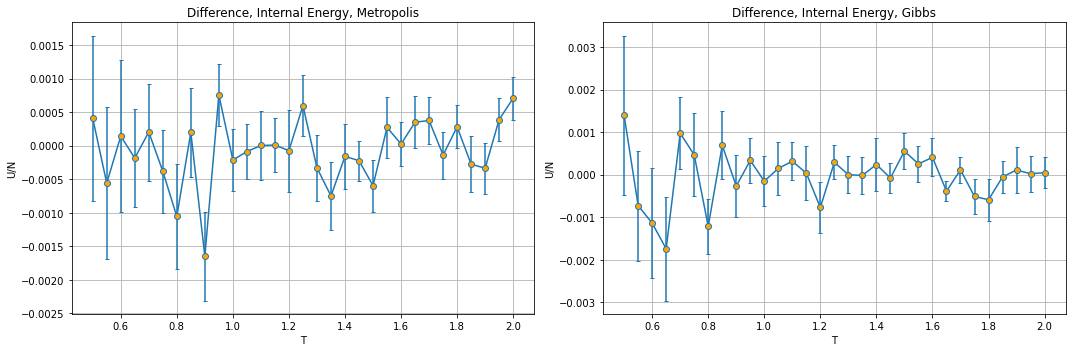

In [32]:
plt.figure(figsize=(15,5))

plt.subplot(121)
x, f, error = np.loadtxt("Boltzmann/ene_metro.dat", unpack='true')
plt.errorbar(x,f-e,yerr=error,capsize=2,marker='o',mfc='orange',ms=6,mew=1)
plt.title('Difference, Internal Energy, Metropolis')
plt.xlabel('T')
plt.ylabel('U/N')
plt.grid(True)

plt.subplot(122)
x, f, error = np.loadtxt("Boltzmann/ene_gibbs.dat", unpack='true')
plt.errorbar(x,f-e,yerr=error,capsize=2,marker='o',mfc='orange',ms=6,mew=1)
plt.title('Difference, Internal Energy, Gibbs')
plt.xlabel('T')
plt.ylabel('U/N')
plt.grid(True)

plt.tight_layout()
plt.show()

<span style="color:blue">  2. Calore specifico per spin: 
\begin{equation}
   \frac{C(N,T)}{N} = \frac{k_B \beta^2}{N} \left(\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2\right)
\end{equation}

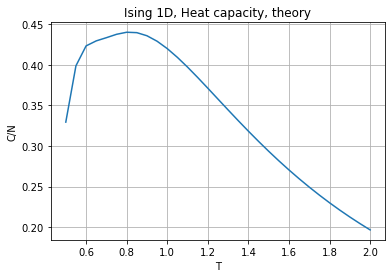

In [31]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat)
plt.title('Ising 1D, Heat capacity, theory')
plt.xlabel('T')
plt.ylabel('C/N')
plt.grid(True)
plt.show()

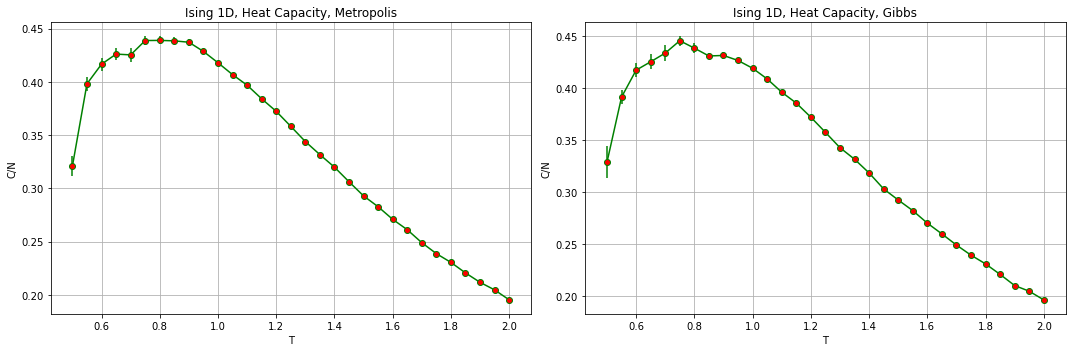

In [33]:
plt.figure(figsize=(15,5))

plt.subplot(121)
x, f, error = np.loadtxt("Boltzmann/heat_metro.dat", unpack='true')
plt.errorbar(x,f,yerr=error, color='green', marker='o',mfc='red',mec='green')
plt.title('Ising 1D, Heat Capacity, Metropolis')
plt.xlabel('T')
plt.ylabel('C/N')
plt.grid(True)

plt.subplot(122)
x, f, error = np.loadtxt("Boltzmann/heat_gibbs.dat", unpack='true')
plt.errorbar(x,f,yerr=error, color='green', marker='o',mfc='red',mec='green')
plt.title('Ising 1D, Heat Capacity, Gibbs')
plt.xlabel('T')
plt.ylabel('C/N')
plt.grid(True)

plt.tight_layout()
plt.show()

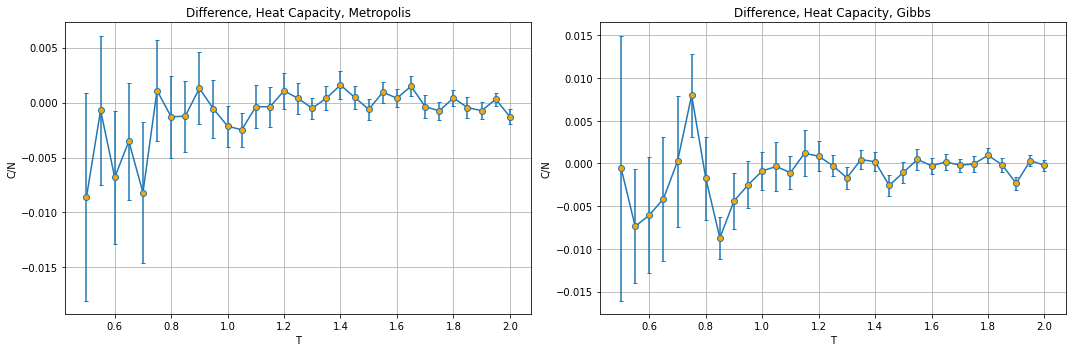

In [34]:
plt.figure(figsize=(15,5))

plt.subplot(121)
x, f, error = np.loadtxt("Boltzmann/heat_metro.dat", unpack='true')
plt.errorbar(x,f-heat,yerr=error,capsize=2,marker='o',mfc='orange',ms=6,mew=1)
plt.title('Difference, Heat Capacity, Metropolis')
plt.xlabel('T')
plt.ylabel('C/N')
plt.grid(True)

plt.subplot(122)
x, f, error = np.loadtxt("Boltzmann/heat_gibbs.dat", unpack='true')
plt.errorbar(x,f-heat,yerr=error,capsize=2,marker='o',mfc='orange',ms=6,mew=1)
plt.title('Difference, Heat Capacity, Gibbs')
plt.xlabel('T')
plt.ylabel('C/N')
plt.grid(True)

plt.tight_layout()
plt.show()

<span style="color:blue"> 3. Suscettività magnetica per spin: 
\begin{equation}
    \frac{\chi(N,T)}{N} = \beta \left\langle\left(\sum_{i=1,N}s_i\right)^2 \right\rangle_{h=0}
\end{equation}

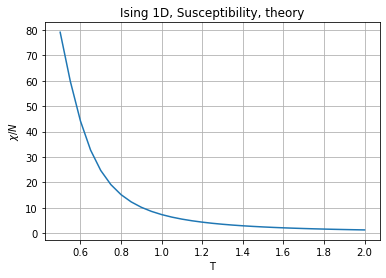

In [35]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X)
plt.title('Ising 1D, Susceptibility, theory')
plt.xlabel('T')
plt.ylabel('$\chi/N$')
plt.grid(True)
plt.show()

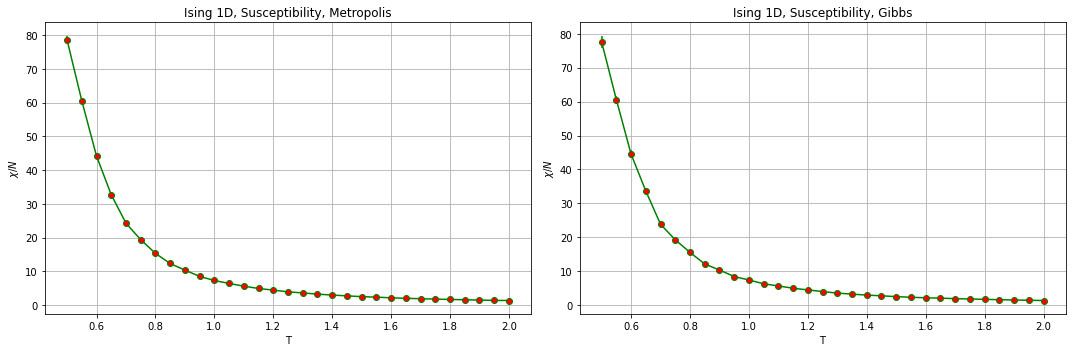

In [36]:
plt.figure(figsize=(15,5))

plt.subplot(121)
x, f, error = np.loadtxt("Boltzmann/chi_metro.dat", unpack='true')
plt.errorbar(x,f,yerr=error, color='green', marker='o',mfc='red',mec='green')
plt.title('Ising 1D, Susceptibility, Metropolis')
plt.xlabel('T')
plt.ylabel('$\chi/N$')
plt.grid(True)

plt.subplot(122)
x, f, error = np.loadtxt("Boltzmann/chi_gibbs.dat", unpack='true')
plt.errorbar(x,f,yerr=error, color='green', marker='o',mfc='red',mec='green')
plt.title('Ising 1D, Susceptibility, Gibbs')
plt.xlabel('T')
plt.ylabel('$\chi/N$')
plt.grid(True)

plt.tight_layout()
plt.show()

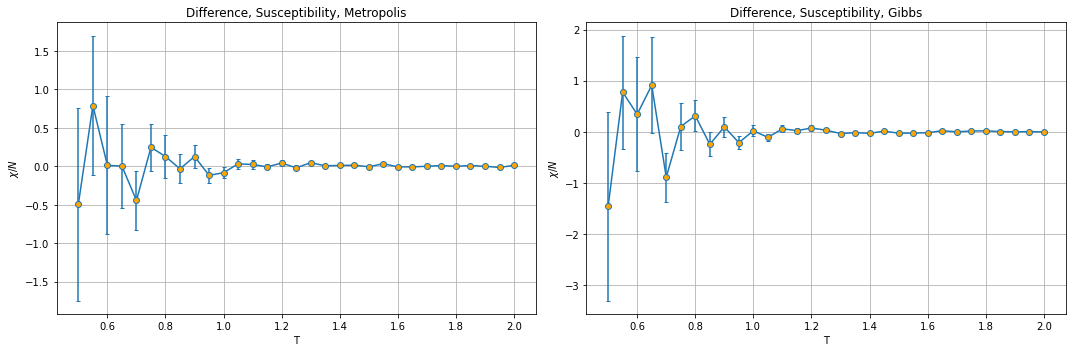

In [37]:
plt.figure(figsize=(15,5))

plt.subplot(121)
x, f, error = np.loadtxt("Boltzmann/chi_metro.dat", unpack='true')
plt.errorbar(x,f-X,yerr=error,capsize=2,marker='o',mfc='orange',ms=6,mew=1)
plt.title('Difference, Susceptibility, Metropolis')
plt.xlabel('T')
plt.ylabel('$\chi/N$')
plt.grid(True)

plt.subplot(122)
x, f, error = np.loadtxt("Boltzmann/chi_gibbs.dat", unpack='true')
plt.errorbar(x,f-X,yerr=error,capsize=2,marker='o',mfc='orange',ms=6,mew=1)
plt.title('Difference, Susceptibility, Gibbs')
plt.xlabel('T')
plt.ylabel('$\chi/N$')
plt.grid(True)

plt.tight_layout()
plt.show()

<span style="color:blue"> 4. Magnetizzazione per spin: 
\begin{equation}
   \frac{M(N,T)}{N} = \left\langle\sum_{i=1,N}s_i\right\rangle_{h=0.02}
\end{equation}

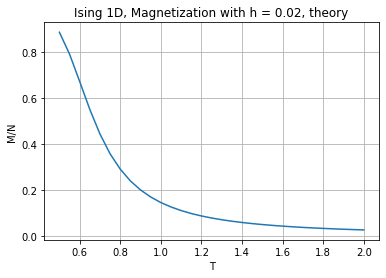

In [38]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M)
plt.title('Ising 1D, Magnetization with h = 0.02, theory')
plt.xlabel('T')
plt.ylabel('M/N')
plt.grid(True)
plt.show()

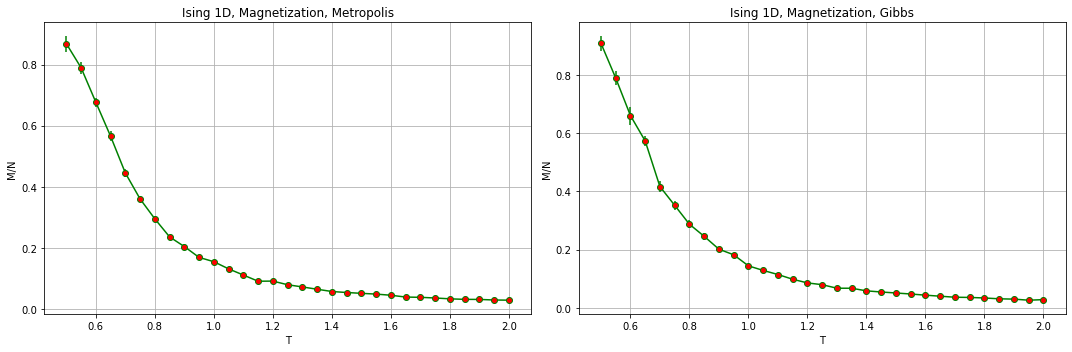

In [40]:
plt.figure(figsize=(15,5))

plt.subplot(121)
x, f, error = np.loadtxt("Boltzmann/mag_metro.dat", unpack='true')
plt.errorbar(x,f,yerr=error, color='green', marker='o',mfc='red',mec='green')
plt.title('Ising 1D, Magnetization, Metropolis')
plt.xlabel('T')
plt.ylabel('M/N')
plt.grid(True)

plt.subplot(122)
x, f, error = np.loadtxt("Boltzmann/mag_gibbs.dat", unpack='true')
plt.errorbar(x,f,yerr=error, color='green', marker='o',mfc='red',mec='green')
plt.title('Ising 1D, Magnetization, Gibbs')
plt.xlabel('T')
plt.ylabel('M/N')
plt.grid(True)

plt.tight_layout()
plt.show()

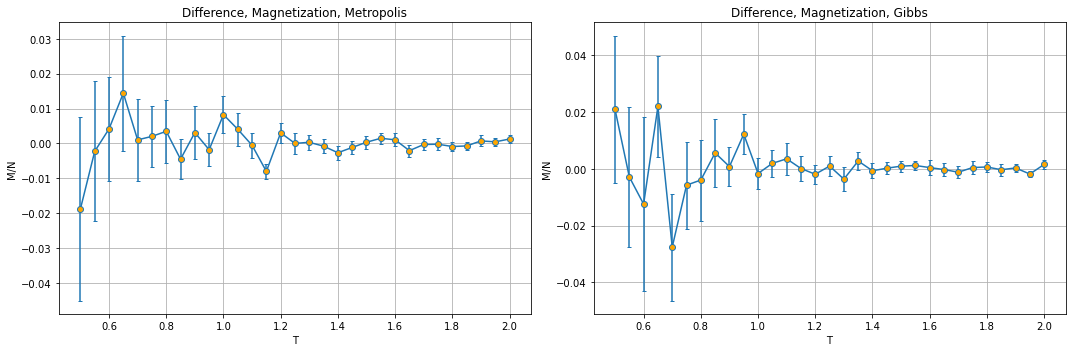

In [41]:
plt.figure(figsize=(15,5))

plt.subplot(121)
x, f, error = np.loadtxt("Boltzmann/mag_metro.dat", unpack='true')
plt.errorbar(x,f-M,yerr=error,capsize=2,marker='o',mfc='orange',ms=6,mew=1)
plt.title('Difference, Magnetization, Metropolis')
plt.xlabel('T')
plt.ylabel('M/N')
plt.grid(True)

plt.subplot(122)
x, f, error = np.loadtxt("Boltzmann/mag_gibbs.dat", unpack='true')
plt.errorbar(x,f-M,yerr=error,capsize=2,marker='o',mfc='orange',ms=6,mew=1)
plt.title('Difference, Magnetization, Gibbs')
plt.xlabel('T')
plt.ylabel('M/N')
plt.grid(True)

plt.tight_layout()
plt.show()

### Conclusioni

Se confrontiamo gli otto grafici dei valori ottenuti con i due tipi di campionamento osserviamo che, per ciascuna delle quattro grandezze fisiche ricercate, i punti campionati sono quasi identici e le curve hanno quasi la stessa forma e lo stesso andamento. In tutti gli otto grafici delle differenze, le barre di errore tagliano l'asse $x$ almeno per il $90\%$ delle volte. L'accordo teoria-esperimento è riuscito. 

Infine è interessante osservare come varia la percentuale di accettazione al variare della temperatura. Con l'algoritmo di Metropolis la percentuale di accettazione aumenta con l'aumentare della temperatura. In particolare, per $T=0.5$ la percentuale è del $2\%$, mentre a $T=2$ è del $54\%$. A bassa $T$ il sistema è congelato e sono pochi gli spin disponibili a cambiare orientazione. Con l'aumentare di $T$, un poco alla volta, il sistema si decongela e iniziano a muoversi tutte le particelle. Con il metodo di Gibbs invece, per come è stato costruito, la percentuale di accettazione è sempre del $100\%$, per ogni $T$.

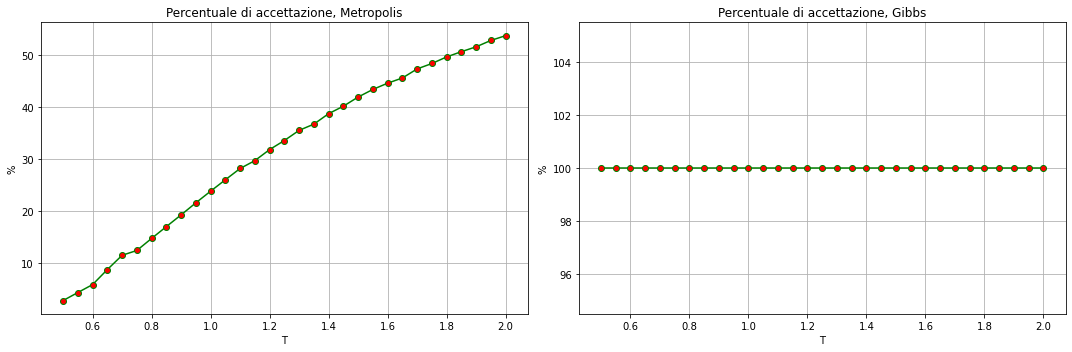

In [2]:
plt.figure(figsize=(15,5))

plt.subplot(121)
x, f = np.loadtxt("Boltzmann/acc_metro.dat", unpack='true')
plt.plot(x,f, color='green',marker='o',mfc='red',mec='green')
plt.title('Percentuale di accettazione, Metropolis')
plt.xlabel('T')
plt.ylabel('%')
plt.grid(True)

plt.subplot(122)
x, f = np.loadtxt("Boltzmann/acc_gibbs.dat", unpack='true')
plt.plot(x,f, color='green',marker='o',mfc='red',mec='green')
plt.title('Percentuale di accettazione, Gibbs')
plt.xlabel('T')
plt.ylabel('%')
plt.grid(True)

plt.tight_layout()
plt.show()